# SENTIMENT ANALYSIS OF TWEETS PROJECT(TECHA INTERN)

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
tweets=pd.read_csv("../input/demonetization-tweets.csv",encoding = "ISO-8859-1")
tweets.head()

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

/opt/conda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,801495656976318464,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.783,0.1,0.117,POSITIVE
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,801495654778413057,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,801495544266821632,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
3,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,801495527024160768,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
4,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,801495445583360002,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.0,0.000,NEUTRAL


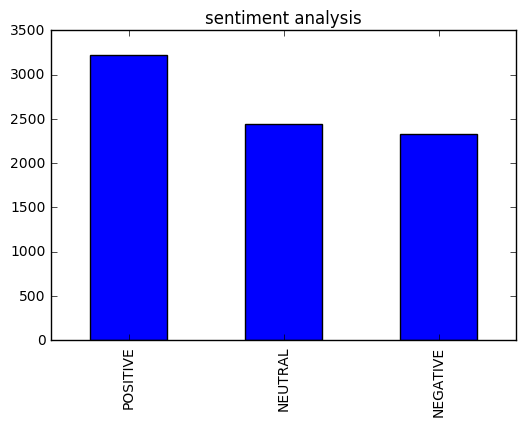

In [3]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

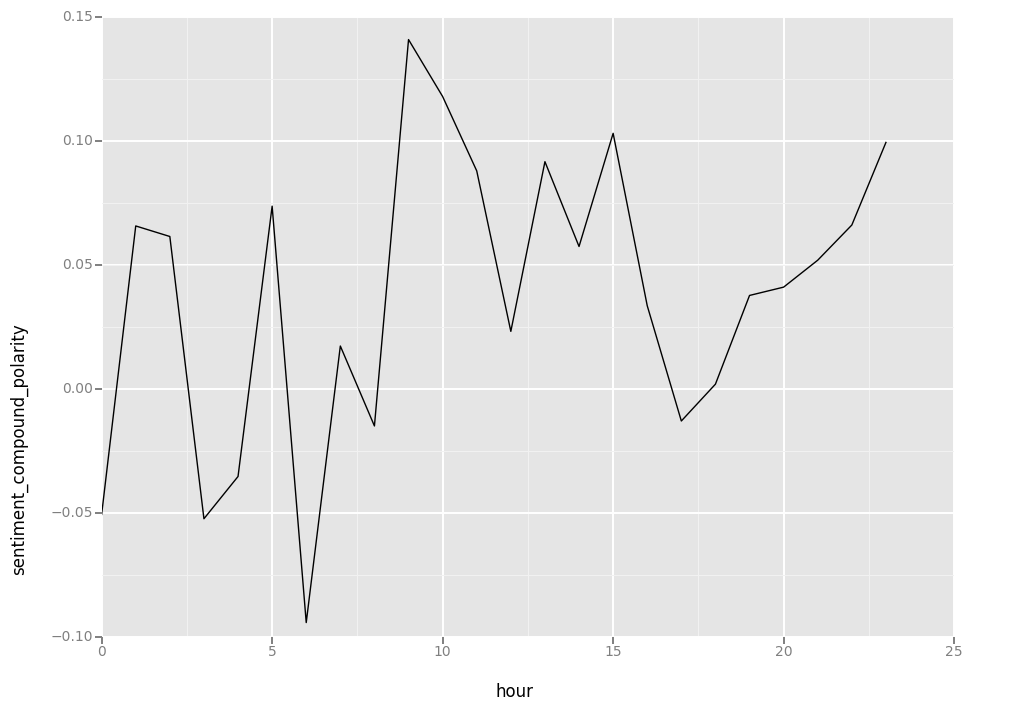

<ggplot: (8727802978582)>


In [4]:
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 6.0)

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute
df=(tweets.groupby('hour',as_index=False).sentiment_compound_polarity.mean())
print(ggplot(aes(x='hour',y='sentiment_compound_polarity'),data=df)+geom_line())

Trend looks like it tweet sentiment becomes positive as time goes on 